In [1]:
import os
import matplotlib.pylab as plt
from matplotlib.patches import Rectangle
import numpy as np


from ipywidgets import Layout, interact, IntSlider, FloatSlider
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default

import DL_Sequence
import iSCAT_Datasets

# num_classes = 5
# res = 256
# exPT_cnt = 10
# devPT_cnt = 0
# exIntensity=1.0
# devIntensity=0.0

# mode = "static"
# PSF_path="../PSF_subpx_fl32.npy"
# PSF = np.load(PSF_path)

# dataset = DL_Sequence.iSCAT_DataGenerator(batch_size=32, epoch_size=128, res=res, frames=64, thread_count=40,
#                     PSF_path=PSF_path, exD=5000, devD=4000, exPT_cnt=exPT_cnt, devPT_cnt=devPT_cnt, exIntensity=exIntensity, devIntensity=devIntensity, target_frame=15,
#                     num_classes=num_classes, verbose = 2, noise_func = None, mode = mode)

epoch_size = 16384
batch_size = 32
num_classes, frames, res, dataset = iSCAT_Datasets.getDatasetGen(0, epoch_size, batch_size, verbose=2, regen=False)

data = dataset.samples
targets = dataset.particles_in_sight_cnt
poss = dataset.particle_positions
pt_cnts = dataset.pt_cnts
dataset.destroy()



Sample width:  448
particlesWorker: Run
Sparse Subpixel Convolution initialized
Preparation of memory took 6 ms
Particle generation time: 11.034s
sampleWorker:particlesWorker:  RunRun


OMP max threads: 24
OMP setting number of threads to 16
Particle generation time: 13.565s
Conv generation time: 29.178s
Computation of convolutions took 25457 ms
Target generation time: 0.078s
Whole generation time: 37.892s
sampleWorker:particlesWorker:Min particle in sight cnt: 0
Max particle in sight cnt: 7
Avg particle in sight cnt: 3.3182373046875
Std particle in sight cnt: 2.166905154267887
class: 0     |1     |2     |3     |4     |5     |6     |7     |
count: 1536  |2464  |2691  |2477  |2199  |1765  |1296  |1956  |
  DieDie



In [2]:
edge = int((PSF.shape[2] - res) / 2)
plt.imshow(PSF[0, 0, edge:-edge, edge:-edge])
plt.axis([-0.5, res-0.5, -0.5, res-0.5])
plt.title("Point Spread Function")
plt.show()

sample_inds = np.insert(np.cumsum(pt_cnts), 0, 0)

sample_cur = 0
step = 0

sample_size_px = 256
FOV_edge = sample_size_px / 2 - res / 2
 
imgs = data[sample_cur]

begin = sample_inds[sample_cur]
end = begin + pt_cnts[sample_cur]

x = poss[step, begin:end, 1]
y = poss[step, begin:end, 0]


# plt.imshow(imgs[step, :, :])
plt.gca().set_aspect('equal')
plt.axis([-0.5, res-0.5, -0.5, res-0.5])
plt.scatter(x,y, c="red")
plt.title("Scattering intensity map")
plt.show()

plt.gca().set_aspect('equal')
plt.axis([-0.5, res-0.5, -0.5, res-0.5])
plt.imshow(data[sample_cur, step])
plt.title("Image in the microscope")
plt.show()

NameError: name 'PSF' is not defined

In [2]:
import tensorflow as tf

test_model = False

print(data.shape, targets.shape)

print(np.max(data), np.min(data))
print(np.mean(targets), np.std(targets))

if test_model:
    model_name = "models/model_dense_5000_simple_" + mode
    model = tf.keras.models.load_model(model_name + ".h5")
    predictions = tf.argmax(model.predict(data), axis = 1)
    predictions = np.array(predictions)
    print("Accuracy: ", np.mean(predictions == targets))

print(np.nonzero(pt_cnts == 30))
print(np.nonzero(pt_cnts == 170))
print(np.nonzero(pt_cnts == 309))

(16384, 32, 64, 64) (16384,)
1.0 0.0
3.3182373046875 2.166905154267887
(array([  376,   806,  1223,  1261,  1451,  1769,  2799,  3160,  3630,
        4217,  4268,  4293,  5021,  5035,  6584,  6673,  7017,  7018,
        7274,  7299,  7420,  7939,  8688,  8726,  9388, 10548, 10728,
       10966, 12017, 12293, 12359, 12531, 12742, 12887, 13612, 13831,
       13986, 14037, 14109, 14450, 14978, 15052, 15078, 15143, 15343,
       15568, 16132, 16374]),)
(array([  132,   358,   493,   548,   627,  1216,  1293,  1834,  2505,
        2951,  3247,  3711,  4033,  4208,  4501,  4844,  5174,  6115,
        6272,  6760,  7504,  8014,  8582,  8769,  9433, 10065, 10416,
       10418, 11863, 11995, 12142, 12239, 12378, 12477, 12542, 12911,
       13490, 14567, 14831, 15004, 15293, 15602, 15713]),)
(array([    4,   455,   673,  1099,  1104,  1268,  1560,  1578,  2209,
        2344,  2455,  2591,  2701,  2708,  2914,  3055,  3315,  3598,
        3663,  3804,  4198,  4796,  4808,  5598,  5786,  5952,  60

In [21]:
sample_inds = np.insert(np.cumsum(pt_cnts), 0, 0)

sample_size_px = 480
FOV_edge = sample_size_px / 2 - res / 2

def plot_step_fast(step, sample_cur):    
    imgs = data[sample_cur]
    
    begin = sample_inds[sample_cur]
    end = begin + pt_cnts[sample_cur]
    
    poss_step = step % poss.shape[0]
    
    x = poss[poss_step, begin:end, 1]
    y = poss[poss_step, begin:end, 0]
    
#     plt.subplot(1, 2, 1)
    plt.axis([-FOV_edge, sample_size_px-FOV_edge, -FOV_edge, sample_size_px-FOV_edge])
    plt.gca().add_patch(Rectangle((0, 0), res, res, edgecolor = 'red', fill=False))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(x,y)
    plt.title("Sample")
    plt.show()
    
#     plt.subplot(1, 2, 2)
    plt.imshow(imgs[step, :, :])
    plt.axis([-0.5, res-0.5, -0.5, res-0.5])
    plt.scatter(x,y, c="red")
    plt.title("Camera frame")
    plt.show()
    
    print("gold:", targets[sample_cur])
    print("sample cnt:", pt_cnts[sample_cur])
    if test_model:
        print("pred:", int(predictions[sample_cur]))


    
interact(plot_step_fast, step=IntSlider(value=15, min=0, max=data.shape[1] - 1), sample_cur=IntSlider(value=1549, min=0, max=data.shape[0] - 1));

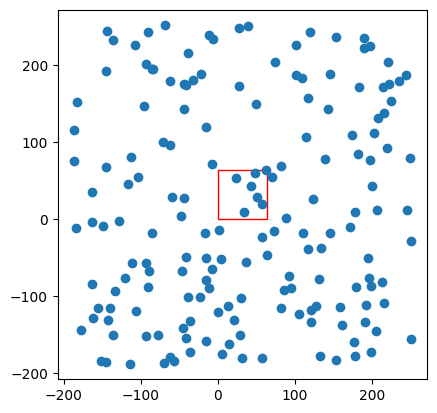

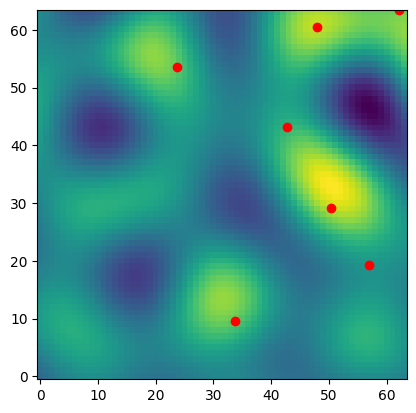

gold: 6
sample cnt: 170


In [35]:
sample_inds = np.insert(np.cumsum(pt_cnts), 0, 0)

sample_size_px = 480
FOV_edge = sample_size_px / 2 - res / 2

sample_cur = 548 #1578, 2701, 3598
step = 0
imgs = data[sample_cur]

begin = sample_inds[sample_cur]
end = begin + pt_cnts[sample_cur]

poss_step = step % poss.shape[0]

x = poss[poss_step, begin:end, 1]
y = poss[poss_step, begin:end, 0]

#     plt.subplot(1, 2, 1)
plt.axis([-FOV_edge, sample_size_px-FOV_edge, -FOV_edge, sample_size_px-FOV_edge])
plt.gca().add_patch(Rectangle((0, 0), res, res, edgecolor = 'red', fill=False))
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(x,y)
# plt.title("Sample")
plt.show()

#     plt.subplot(1, 2, 2)
plt.imshow(imgs[step, :, :])
plt.axis([-0.5, res-0.5, -0.5, res-0.5])
plt.scatter(x,y, c="red")
# plt.title("Camera frame")
plt.show()

print("gold:", targets[sample_cur])
print("sample cnt:", pt_cnts[sample_cur])
if test_model:
    print("pred:", int(predictions[sample_cur]))
